In [1]:
import os
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import logging
logging.getLogger().setLevel(logging.INFO)
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_df = pd.read_csv("train_10000.txt", header=None)
test_df = pd.read_csv("val_10000.txt", header=None)
val_df = pd.read_csv("test_10000.txt", header=None)

train_df.columns = val_df.columns = test_df.columns = ["label", "url"]
print(len(train_df), len(test_df), len(val_df))

47226 5248 9141


In [4]:
out_df = pd.read_csv("../taipei/out.csv", header=None)
out_df.columns = ["label", "url"]
out_df.head()

label                            url
0      0  http://diaryofagameaddict.com
1      0        http://espdesign.com.au
2      0      http://iamagameaddict.com
3      0           http://kalantzis.net
4      0   http://slightlyoffcenter.net

# Words

In [5]:
vectorizer = TfidfVectorizer(analyzer="word", encoding="utf-8", decode_error="ignore", lowercase=True, use_idf=True)
# vectorizer = TfidfVectorizer(analyzer="char", encoding="utf-8", tokenizer=tokenizer, vocabulary=word_dict, \
#                              decode_error="ignore", lowercase=False, use_idf=True)

vectorizer.fit(train_df.url.values)
print(list(vectorizer.vocabulary_.keys())[:7])

['richter', '51d2615c402c7d17e5fd99a20ec2e93c', 'gt3', 'usd', '55397a9f4a0c4b597bc842d2', 'randy', 'b6e41324']


In [6]:
X_train = vectorizer.transform(train_df.url.values)
X_val = vectorizer.transform(val_df.url.values)
X_test = vectorizer.transform(test_df.url.values)
X_out = vectorizer.transform(out_df.url.values)
print(X_train.shape, X_val.shape, X_test.shape, X_out.shape)

(47226, 71123) (9141, 71123) (5248, 71123) (411247, 71123)


# visualize data distribution

In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, train_df.label.values)
clf = make_pipeline(vectorizer, model)
word_clf = clf

In [173]:
import xgboost as xgb
from lightgbm import LGBMClassifier, LGBMRegressor
model = xgb.XGBClassifier(n_jobs=6, n_estimators=200, max_depth=60)
model.fit(X_train, train_df.label.values)
clf = make_pipeline(vectorizer, model)
word_clf = clf

In [73]:
# xgb
print('train_accuracy', cv_results['train_accuracy'], np.mean(cv_results['train_accuracy']), np.std(cv_results['train_accuracy']))
print('train_roc_auc', cv_results['train_roc_auc'], np.mean(cv_results['train_roc_auc']), np.std(cv_results['train_roc_auc']))
print('test_accuracy', cv_results['test_accuracy'], np.mean(cv_results['test_accuracy']), np.std(cv_results['test_accuracy']))
print('test_roc_auc', cv_results['test_roc_auc'], np.mean(cv_results['test_roc_auc']), np.std(cv_results['test_roc_auc']))

train_accuracy [0.99971112 0.99968706 0.99951856 0.99966299 0.99975928 0.99973521] 0.9996790373687818 7.820740304899352e-05
train_roc_auc [0.9999985  0.99999851 0.99999763 0.99999888 0.99999938 0.99999755] 0.9999984087724517 6.496458907540338e-07
test_accuracy [0.94440433 0.94595571 0.94390948 0.94451131 0.94956668 0.94727973] 0.9459378749666133 0.0019778074887976047
test_roc_auc [0.99433637 0.99292153 0.99326481 0.99402836 0.99364773 0.9945614 ] 0.9937933663940464 0.0005774395508624611


In [12]:
print('train_accuracy', cv_results['train_accuracy'], np.mean(cv_results['train_accuracy']), np.std(cv_results['train_accuracy']))
print('train_roc_auc', cv_results['train_roc_auc'], np.mean(cv_results['train_roc_auc']), np.std(cv_results['train_roc_auc']))
print('test_accuracy', cv_results['test_accuracy'], np.mean(cv_results['test_accuracy']), np.std(cv_results['test_accuracy']))
print('test_roc_auc', cv_results['test_roc_auc'], np.mean(cv_results['test_roc_auc']), np.std(cv_results['test_roc_auc']))

train_accuracy [0.99975927 0.99963892 0.99980742 0.99975928 0.9995667  0.99963892] 0.9996950857707715 8.529491964487478e-05
train_roc_auc [0.99999985 0.99999678 0.99999979 0.99999984 0.99999918 0.99999954] 0.9999991636403257 1.0894681176288563e-06
test_accuracy [0.97208183 0.9625662  0.97640828 0.97604718 0.96352913 0.96244584] 0.9688464098126657 0.0061668850939610035
test_roc_auc [0.99844031 0.99601578 0.99874995 0.99835637 0.99740666 0.99724538] 0.9977024082865368 0.0009318942545964622


In [174]:
print("accuracy score :")
print('train', model.score(X_train, train_df.label.values))
print('val', model.score(X_val, val_df.label.values))
print('test', model.score(X_test, test_df.label.values))
print('out', model.score(X_out, out_df.label.values))
print()

train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)
out_pred = model.predict(X_out)

print("roc_auc_score :")
print('train', roc_auc_score(train_pred, train_df.label.values))
print('val', roc_auc_score(val_pred, val_df.label.values))
print('test', roc_auc_score(test_pred, test_df.label.values))
print('out', roc_auc_score(out_pred, out_df.label.values))

accuracy score :
train 0.9999364756701817
val 0.9219997812055574
test 0.9778963414634146
out 0.22188368547369341

roc_auc_score :
train 0.9999364765668102
val 0.5
test 0.9785104136673386
out 0.5754683671416623


In [157]:
# xgboost

print("accuracy score :")
print('train', model.score(X_train, train_df.label.values))
print('val', model.score(X_val, val_df.label.values))
print('test', model.score(X_test, test_df.label.values))
print('out', model.score(X_out, out_df.label.values))
print()

train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)
out_pred = model.predict(X_out)

print("roc_auc_score :")
print('train', roc_auc_score(train_pred, train_df.label.values))
print('val', roc_auc_score(val_pred, val_df.label.values))
print('test', roc_auc_score(test_pred, test_df.label.values))
print('out', roc_auc_score(out_pred, out_df.label.values))

accuracy score :
train 0.9954262482530809
val 0.9090909090909091
test 0.9754192073170732
out 0.22907401148215062

roc_auc_score :
train 0.9954373943417604
val 0.5
test 0.9760431804601016
out 0.5746360584341359


# Char

In [19]:
vectorizer = TfidfVectorizer(analyzer="char", encoding="utf-8", decode_error="ignore", lowercase=False, use_idf=True)
vectorizer.fit(train_df.url.values)
print(list(vectorizer.vocabulary_.keys())[:7])

['|', '.', 'f', 'i', '\x9a', 'K', 'W']


In [20]:
X_train = vectorizer.transform(train_df.url.values)
X_val = vectorizer.transform(val_df.url.values)
X_test = vectorizer.transform(test_df.url.values)
X_out = vectorizer.transform(out_df.url.values)
print(X_train.shape, X_val.shape, X_test.shape, X_out.shape)

(47226, 129) (9141, 129) (5248, 129) (411247, 129)


In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, train_df.label.values)
clf = make_pipeline(vectorizer, model)
char_clf = clf

In [17]:
cv_results = cross_validate(clf, train_df.url.values, train_df.label.values, cv=6, \
                            return_train_score=True, scoring=('accuracy', 'roc_auc'))

In [18]:
print('train_accuracy', cv_results['train_accuracy'], np.mean(cv_results['train_accuracy']), np.std(cv_results['train_accuracy']))
print('train_roc_auc', cv_results['train_roc_auc'], np.mean(cv_results['train_roc_auc']), np.std(cv_results['train_roc_auc']))
print('test_accuracy', cv_results['test_accuracy'], np.mean(cv_results['test_accuracy']), np.std(cv_results['test_accuracy']))
print('test_roc_auc', cv_results['test_roc_auc'], np.mean(cv_results['test_roc_auc']), np.std(cv_results['test_roc_auc']))

train_accuracy [0.99891671 0.99937413 0.99908526 0.99944634 0.99910934 0.99927784] 0.9992016025284194 0.00018197468310008968
train_roc_auc [0.99999599 0.99999836 0.9999963  0.99999798 0.99999539 0.99999534] 0.9999965590884362 1.1896290780276876e-06
test_accuracy [0.98026474 0.97580645 0.98314877 0.98013962 0.98567646 0.9844728 ] 0.9815848072243109 0.0032850313916912835
test_roc_auc [0.99723144 0.99574837 0.99723799 0.99700847 0.99797079 0.99765437] 0.9971419036255419 0.000698411951609219


In [22]:
print("accuracy score :")
print('train', model.score(X_train, train_df.label.values))
print('val', model.score(X_val, val_df.label.values))
print('test', model.score(X_test, test_df.label.values))
print('out', model.score(X_out, out_df.label.values))
print()

train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)
out_pred = model.predict(X_out)

print("roc_auc_score :")
print('train', roc_auc_score(train_pred, train_df.label.values))
print('val', roc_auc_score(val_pred, val_df.label.values))
print('test', roc_auc_score(test_pred, test_df.label.values))
print('out', roc_auc_score(out_pred, out_df.label.values))

accuracy score :
train 0.9991106593825435
val 0.5375779455201838
test 0.9704649390243902
out 0.25571736693519953

roc_auc_score :
train 0.9991108348314779
val 0.5
test 0.9707538026705126
out 0.579195547808265


# Interpret

# lime

# ["Why Should I Trust You?": Explaining the Predictions of Any Classifier](https://arxiv.org/abs/1602.04938)
LIME: Ribeiro, Marco Tulio, Sameer Singh, and Carlos Guestrin. "Why should i trust you?: Explaining the predictions of any classifier." Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining. ACM, 2016.

github : https://github.com/marcotcr/lime

features:
1. tabular data
2. regression decision boundary
3. images
4. highlight text
5. Submodular Pick

In [175]:
import lime
from lime import lime_text
c = make_pipeline(vectorizer, model)
class_names=['malicious', 'benign']

In [176]:
print(c.predict_proba([val_df.url.values[0]]), val_df.label.values[0])

[[5.968809e-04 9.994031e-01]] 1


In [177]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(split_expression=r'\W+', char_level=False, class_names=['malicious', 'benign'])

In [178]:
idx = 83
exp = explainer.explain_instance(test_df.url.values[idx], (lambda x:c.predict_proba(x)*50), labels=(0,), num_features=6, num_samples=5000)
print('Id: %d, %s' % (idx, test_df.url.values[idx]))
print('Probability(malicious) =', c.predict_proba([test_df.url.values[idx]])[0,0])
print('True class: %s' % class_names[test_df.label.values[idx]])

Id: 83, http://www.alsultanah.com/login.jsp.htm?tracelog=notificationtips2016310%5Cu0026amp
Probability(malicious) = 0.9998156
True class: malicious


In [66]:
# examine the estimated influence score on feature
test_vectors = X_test
print('Original prediction:', model.predict_proba(test_vectors[idx])[0,0])

tmp = test_vectors[idx].copy()
cnt = 0
for token, prob in exp.as_list(label=0):
    if token in vectorizer.vocabulary_:
        cnt += prob
        tmp[0,vectorizer.vocabulary_[token]] = 0

tmp *= (np.sum(test_vectors[idx]) / np.sum(tmp))
        
print('estimate reduce score : {}'.format(cnt))

print('Prediction removing some features:', model.predict_proba(tmp)[0,0])
print('Difference:', model.predict_proba(tmp)[0,0] - model.predict_proba(test_vectors[idx])[0,0])

Original prediction: 1.0
estimate reduce score : 0.0534729635893543
Prediction removing some features: 0.86
Difference: -0.14


# Visualizing explanations

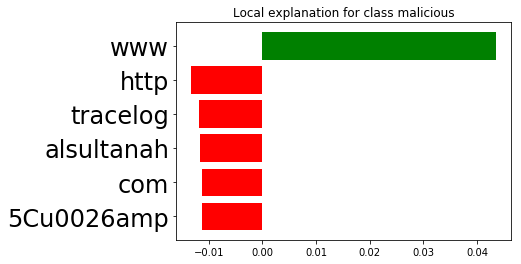

In [179]:
%matplotlib inline
fig = exp.as_pyplot_figure(label=0)
#plt.title('Attribution', fontsize= 15)
plt.tick_params(axis='y', labelsize=24)
plt.savefig('lime_histogram.pdf', bbox_inches = 'tight')
plt.show()

In [126]:
exp.show_in_notebook(text=False)

In [180]:
exp.show_in_notebook(text=True)
plt.show()

In [172]:
exp.save_to_file('oi.html')

# Shap

In [153]:
import shap
# load JS visualization code to notebook
shap.initjs()

In [231]:
target = X_train[:10000]
X = {}
for token in vectorizer.vocabulary_:
    idx = vectorizer.vocabulary_[token]
    X[token] = target[:, idx].toarray().flatten()
X = pd.DataFrame(X)

In [232]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [235]:
# visualize the first prediction's malicious explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])
#shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X.iloc[0,:])

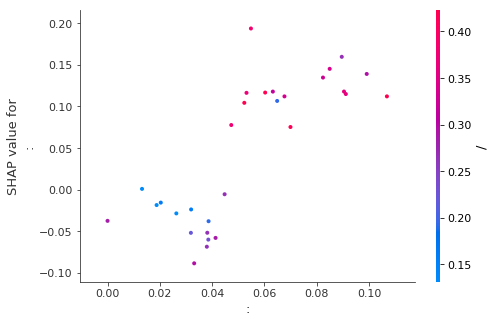

In [34]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot(":", shap_values[0], X)

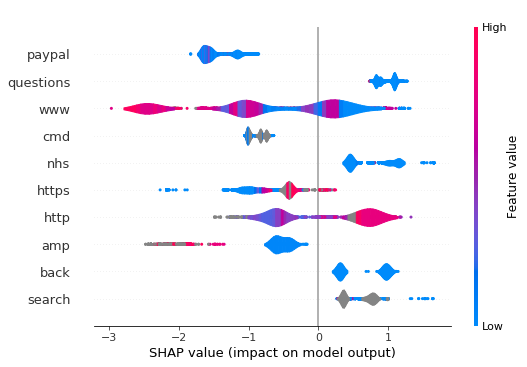

In [242]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X, max_display=10, plot_type='violin')

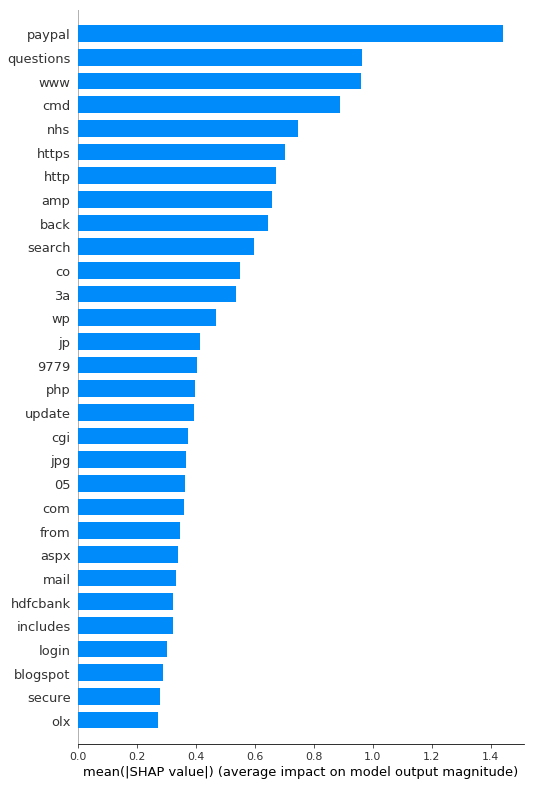

In [243]:
shap.summary_plot(shap_values, X, plot_type="bar", max_display=30)